<a href="https://colab.research.google.com/github/anaguilarar/Pillars_PNuT/blob/main/root_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To speed up the detection process, please use gpu, habilitate the option in:
- Runtime -> change runtime type -> hardware accelerator -> gpu 

In [5]:
import os
from google.colab import files
from IPython.display import Image
from PIL import Image as Img
import numpy as np
import io

if not os.path.exists("/content/Pillars_PNuT") and not os.getcwd().endswith("/content/Pillars_PNuT"):
    !git clone https://github.com/anaguilarar/Pillars_PNuT.git
    print("Cloned")
    
else:
    print("Pillars_PNuT directory already exists")

if not os.getcwd().endswith("/content/Pillars_PNuT"):
  os.chdir("/content/Pillars_PNuT")

### folder that will contain the imagery
imagery_path = "/content/"


Pillars_PNuT directory already exists


### Images uploading

To use this algorithm is necessary first to upload the pillar images. 
- one option is to drag all your images to the left panel that appears after clicking on the folder symbol. 
- or you can use the following cell to upload your images from your local storage.


In [2]:

images = files.upload()

for i in range(len(images)):
  m = Image(list(images.keys())[i])
  image = Img.open(io.BytesIO(m.data)).save(os.path.join(imagery_path,list(images.keys())[i]))


Saving col-0-line36--p7_jpg.rf.86c17994647c7b9a2934c719c3296910.jpg to col-0-line36--p7_jpg.rf.86c17994647c7b9a2934c719c3296910.jpg
Saving line9-p1_jpg.rf.d7b92679d597945478462dacf94d35c0.jpg to line9-p1_jpg.rf.d7b92679d597945478462dacf94d35c0.jpg
Saving line34-p3_jpg.rf.c1aa749f30f85ddb281f4e7de2ee6543.jpg to line34-p3_jpg.rf.c1aa749f30f85ddb281f4e7de2ee6543.jpg
Saving line35-p1_jpg.rf.4f74da55ea342344539026852c6a3c06.jpg to line35-p1_jpg.rf.4f74da55ea342344539026852c6a3c06.jpg
Saving line37-p1_jpg.rf.96982f02676cbfe891d34c3c8bd6b857.jpg to line37-p1_jpg.rf.96982f02676cbfe891d34c3c8bd6b857.jpg
Saving line42-p4_jpg.rf.75c37f3dfc8568483ebd6eb236eb6a9e.jpg to line42-p4_jpg.rf.75c37f3dfc8568483ebd6eb236eb6a9e.jpg


### Model setting

Once the imagery was uploaded, the next step is to set the root and pillar detector. In order to do that we will use a function named as RootandPillars, this function will first find the root using a segmentation model based on convolutional neural networks. Then the pillars are detected as circles using the [Hough transform](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html).

In [3]:
from root_distance.rootdetector_fun import RootandPillars

wp  = "https://dlmodels-bucket.s3.ap-northeast-1.amazonaws.com/root_detection.zip"
rootdetector = RootandPillars(imagery_path, ## folder that contain images 
                              wp ## CNN model's weight
                              )


58889256/58889256 [==============================] - 4s 0us/step
checkpoint load models/root_detection/vgg16_root_detection
1/1 [==============================] - 14s 14s/step
17 circles were found
16 circles were found
16 circles were found
17 circles were found
16 circles were found
16 circles were found


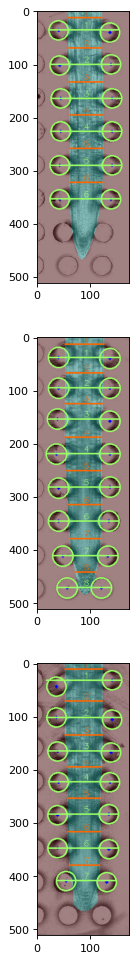

In [4]:
f = rootdetector.plot_final_layer(pillars_color=(153, 255, 102), maximages = 3, figsize = (8,15))

### Exporting images and tables

In [6]:
rootdetector.lines_table_as_csv("test.csv")
rootdetector.export_final_images('/content/overlaped_images/')


In [7]:
rootdetector.root_lines_as_table

,index,line_index,distances_pixels,distances_microns,corrected_factor,object,image_name
0,0,1,64.0,159.085260,-50.457370,root,line35-p1_jpg.rf.4f74da55ea342344539026852c6a3...
1,1,2,64.0,159.085260,-50.457370,root,line35-p1_jpg.rf.4f74da55ea342344539026852c6a3...
2,2,3,64.0,159.085260,-50.457370,root,line35-p1_jpg.rf.4f74da55ea342344539026852c6a3...
3,3,4,62.0,154.113845,-52.943077,root,line35-p1_jpg.rf.4f74da55ea342344539026852c6a3...
4,4,5,61.0,151.628138,-54.185931,root,line35-p1_jpg.rf.4f74da55ea342344539026852c6a3...
5,5,6,61.0,151.628138,-54.185931,root,line35-p1_jpg.rf.4f74da55ea342344539026852c6a3...
6,0,1,73.0,181.456624,-39.271688,root,line42-p4_jpg.rf.75c37f3dfc8568483ebd6eb236eb6...
7,1,2,71.0,176.485210,-41.757395,root,line42-p4_jpg.rf.75c37f3dfc8568483ebd6eb236eb6...
8,2,3,70.0,173.999503,-43.000249,root,line42-p4_jpg.rf.75c37f3dfc8568483ebd6eb236eb6...
9,3,4,68.0,169.028088,-45.485956,root,line42-p4_jpg.rf.75c37f3dfc8568483ebd6eb236eb6...
